In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\varsh\Downloads\Unemployment in India.csv")

In [3]:
print(df.head())
print(df.columns)

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  
Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
     

In [4]:
df.columns = df.columns.str.strip()

In [6]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


In [7]:
df.dropna(inplace=True)
print(df.describe())


                                Date  Estimated Unemployment Rate (%)  \
count                            740                       740.000000   
mean   2019-12-12 18:36:58.378378496                        11.787946   
min              2019-05-31 00:00:00                         0.000000   
25%              2019-08-31 00:00:00                         4.657500   
50%              2019-11-30 00:00:00                         8.350000   
75%              2020-03-31 00:00:00                        15.887500   
max              2020-06-30 00:00:00                        76.740000   
std                              NaN                        10.721298   

       Estimated Employed  Estimated Labour Participation Rate (%)  
count        7.400000e+02                               740.000000  
mean         7.204460e+06                                42.630122  
min          4.942000e+04                                13.330000  
25%          1.190404e+06                                38.062500

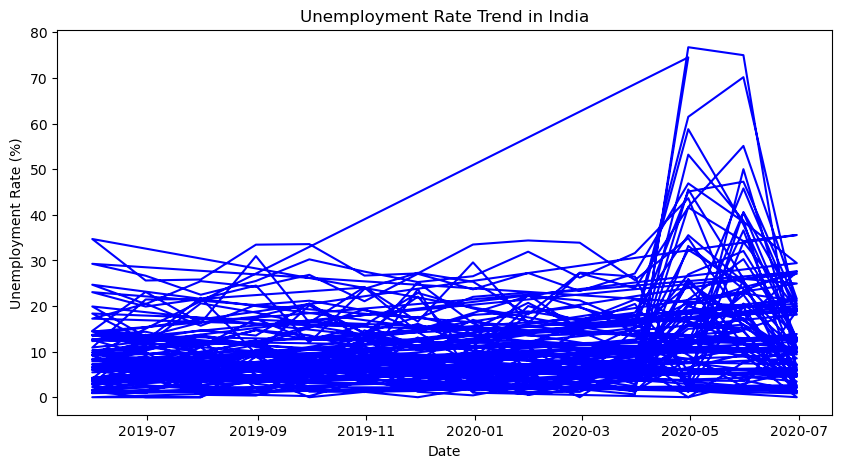

In [8]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Estimated Unemployment Rate (%)'], color='blue')
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate Trend in India")
plt.show()


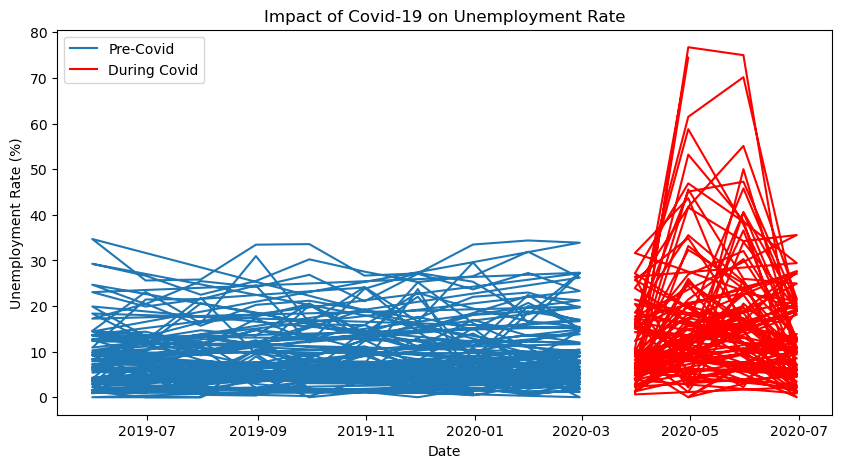

In [9]:
covid_data = df[df['Date'] >= '2020-03-01']
pre_covid_data = df[df['Date'] < '2020-03-01']

plt.figure(figsize=(10,5))
plt.plot(pre_covid_data['Date'], pre_covid_data['Estimated Unemployment Rate (%)'], label='Pre-Covid')
plt.plot(covid_data['Date'], covid_data['Estimated Unemployment Rate (%)'], label='During Covid', color='red')
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.title("Impact of Covid-19 on Unemployment Rate")
plt.legend()
plt.show()

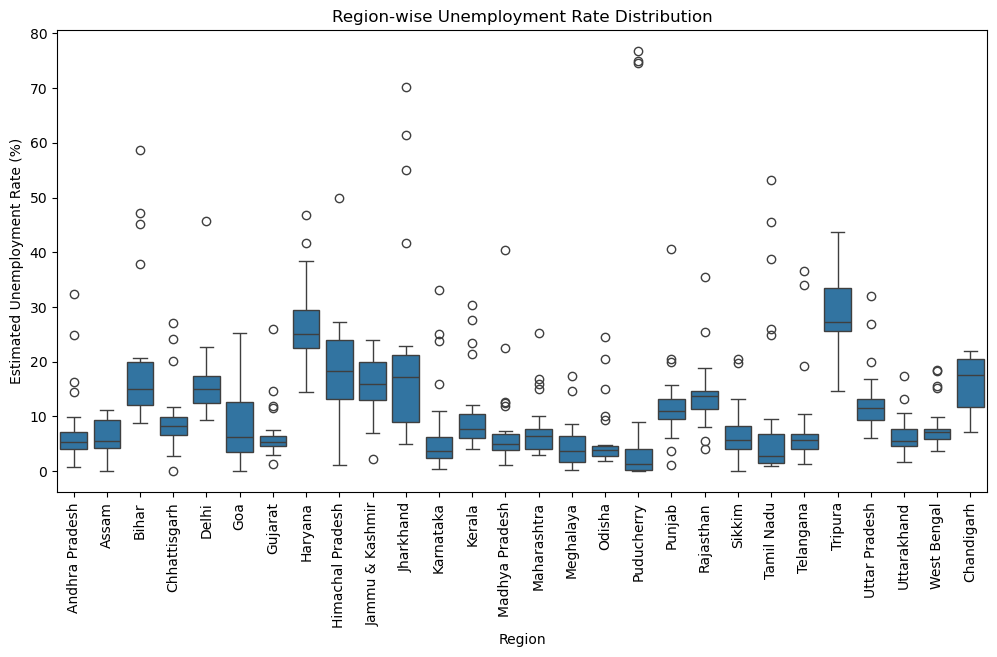

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=df)
plt.xticks(rotation=90)
plt.title("Region-wise Unemployment Rate Distribution")
plt.show()

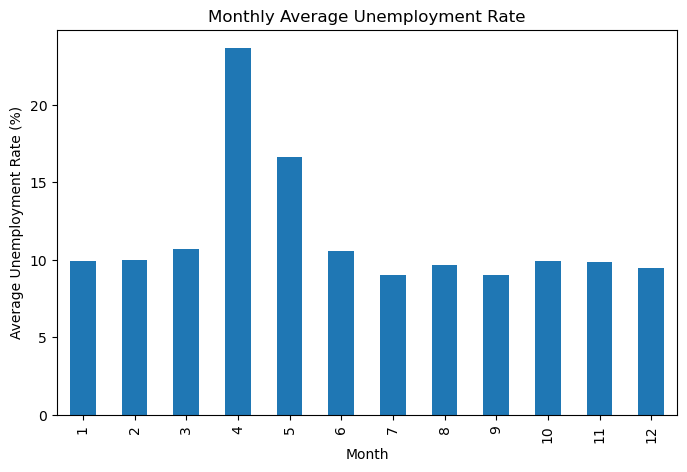

In [11]:
df['Month'] = df['Date'].dt.month

monthly_avg = df.groupby('Month')['Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(8,5))
monthly_avg.plot(kind='bar')
plt.xlabel("Month")
plt.ylabel("Average Unemployment Rate (%)")
plt.title("Monthly Average Unemployment Rate")
plt.show()

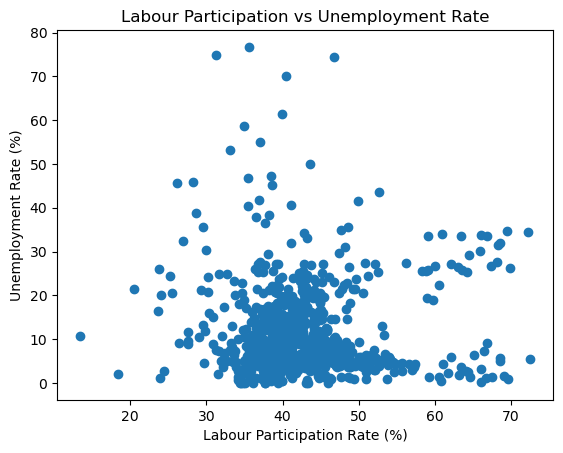

In [12]:
plt.scatter(df['Estimated Labour Participation Rate (%)'],
            df['Estimated Unemployment Rate (%)'])
plt.xlabel("Labour Participation Rate (%)")
plt.ylabel("Unemployment Rate (%)")
plt.title("Labour Participation vs Unemployment Rate")
plt.show()